In [ ]:
# ‚úÖ ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ïπò (NanumGothic)
!apt-get update -qq
!apt-get install -y fonts-nanum

# ‚úÖ matplotlib Ìè∞Ìä∏ Ï∫êÏãú ÏÇ≠Ï†ú
import os
os.system('rm -rf ~/.cache/matplotlib')

print("‚úÖ Ìè∞Ìä∏ ÏÑ§Ïπò ÏôÑÎ£å! Ïù¥Ï†ú Îü∞ÌÉÄÏûÑ > Îã§Ïãú ÏãúÏûë(ctrl+M+.) ÏùÑ Íº≠ Ìï¥Ï£ºÏÑ∏Ïöî.")

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.
‚úÖ Ìè∞Ìä∏ ÏÑ§Ïπò ÏôÑÎ£å! Ïù¥Ï†ú Îü∞ÌÉÄÏûÑ > Îã§Ïãú ÏãúÏûë(ctrl+M+.) ÏùÑ Íº≠ Ìï¥Ï£ºÏÑ∏Ïöî.


In [1]:
# Í∏∞Î≥∏ ÎùºÏù¥Î∏åÎü¨Î¶¨
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Í∑∏ÎûòÌîÑ Í∏∞Î≥∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'NanumGothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# Í≤ΩÍ≥† Îú®ÏßÄ ÏïäÍ≤å
import warnings
warnings.filterwarnings('ignore')

#Ï†ÄÏû•ÎùºÏù¥Î∏åÎü¨Î¶¨
import pickle

# ÌèâÍ∞ÄÌï®Ïàò
# Î∂ÑÎ•òÏö©
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# ÌöåÍ∑ÄÏö©
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# ÌëúÏ§ÄÌôî
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Îç∞Ïù¥ÌÑ∞Î•º ÌïôÏäµÏö©Í≥º Í≤ÄÏ¶ùÏö©ÏúºÎ°ú ÎÇòÎààÎã§.
from sklearn.model_selection import train_test_split

import os


In [3]:
df_01 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö•·Ñê·Ö©·Ü´/data/2020-Jan.csv')
df_01

event_time event_type  product_id          category_id  \
0         2020-01-01 00:00:00 UTC       view     1005073  2232732093077520756   
1         2020-01-01 00:00:01 UTC       view     1005192  2232732093077520756   
2         2020-01-01 00:00:01 UTC       view   100063693  2053013552427434207   
3         2020-01-01 00:00:01 UTC       view     5100816  2232732103831716449   
4         2020-01-01 00:00:02 UTC       view   100014325  2232732103294845523   
...                           ...        ...         ...                  ...   
55967036  2020-01-31 23:59:59 UTC       view     5100833  2232732103831716449   
55967037  2020-01-31 23:59:59 UTC       view     1005239  2232732093077520756   
55967038  2020-01-31 23:59:59 UTC       view   100043202  2053013556521075159   
55967039  2020-01-31 23:59:59 UTC       view     2900565  2232732102103663163   
55967040  2020-01-31 23:59:59 UTC       view     1004785  2232732093077520756   

                      category_code    brand    price    user_id  \
0          construction.tools.light  samsung  1130.02  519698804   
1          construction.tools.light    meizu   205.67  527767423   
2                     apparel.shirt   turtle   136.43  519046195   
3                     apparel.shoes   xiaomi    29.95  518269232   
4            apparel.shoes.step_ins    intel   167.20  587748686   
...                             ...      ...      ...        ...   
55967036              apparel.shoes   xiaomi    33.72  517548219   
55967037   construction.tools.light   xiaomi   228.83  512985520   
55967038              apparel.shoes  respect    47.36  513043451   
55967039  furniture.bedroom.blanket    midea    51.30  581011571   
55967040   construction.tools.light   huawei   230.25  554528253   

                                  user_session  
0         69b5d72f-fd6e-4fed-aa23-1286b2ca89a0  
1         7f596032-ccbf-4643-9bad-e36a209512b4  
2         d1e2f343-84bb-49bd-b13d-ca0f1ed9910e  
3         0444841c-38ef-410c-b11f-7b35ea4e5991  
4         31b7d4cf-dfac-4895-9927-90fa3254f860  
...                                        ...  
55967036  37af3593-a086-4ad8-b6e5-8f87370d91e3  
55967037  4d185c67-1425-4f89-904e-bd156c840702  
55967038  4d614d05-3b0c-4504-a75e-9e09715f737f  
55967039  a60355b0-eb87-4d42-a9ca-d4032c5b1ef5  
55967040  179fc2f1-8545-4011-a154-07e0e3b16d1e  

[55967041 rows x 9 columns]

### Îç∞Ïù¥ÌÑ∞ Íµ¨Ï°∞ ÌôïÏù∏

In [ ]:
df_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67542878 entries, 0 to 67542877
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 4.5+ GB


In [ ]:
df_01['event_type'].value_counts()

event_type
view        62986067
cart         3394763
purchase     1162048
Name: count, dtype: int64

### Ïπ¥ÌÖåÍ≥†Î¶¨ Í∞ØÏàò ÌôïÏù∏

In [ ]:
df_01['category_id'].value_counts()

category_id
2232732093077520756    16259284
2232732099754852875     2097755
2232732079706079299     2007297
2053013554658804075     1374333
2053013553199186187     1311399
                         ...   
2160098698049093979           1
2192201207496311139           1
2053013559935238815           1
2155114836386644747           1
2059484602015154495           1
Name: count, Length: 1162, dtype: int64

### Ï†úÌíàÍ∞ØÏàò ÌôïÏù∏

### Ïπ¥ÌÖåÍ≥†Î¶¨ Î∂ÑÎ•òÎ•º ÎßåÎì§ Ïàò ÏûàÎäî Í≤ΩÏö∞ Í∞íÏù¥ ÏûàÏùå(ÏóÜÎã§Î©¥ NaN)

In [ ]:
df_01['category_code'].value_counts()

category_code
construction.tools.light            16519261
electronics.clocks                   2740539
appliances.personal.massager         2613517
apparel.shoes                        2543026
appliances.kitchen.refrigerators     2401372
                                      ...   
appliances.environment.fan              5354
appliances.kitchen.microwave            3615
computers.components.sound_card         3470
auto.accessories.light                   633
country_yard.furniture.bench               1
Name: count, Length: 135, dtype: int64

### Î∏åÎûúÎìúÎäî ÏïΩ 4637Í∞ú ÏûàÎäî Í≤ÉÏúºÎ°ú ÌôïÏù∏

In [ ]:
df_01['brand'].value_counts()

brand
samsung     8540399
apple       5594757
xiaomi      5208639
huawei      1903123
lucente     1269502
             ...   
fibos             1
xkg               1
koowheel          1
rev               1
camino            1
Name: count, Length: 4637, dtype: int64

### ÏÑ∏ÏÖò Ïª¨Îüº ÌôïÏù∏

In [ ]:
df_01[['event_time', 'user_session']].value_counts()

KeyboardInterrupt: 

### Ïª¨ÎüºÎ≥Ñ Í≤∞Ï∏°Ïπò ÎπÑÏú® ÌôïÏù∏

In [ ]:
# Í≤∞Ï∏°Ïπò ÎπÑÏú® Í≥ÑÏÇ∞
missing_ratio = df_01.isnull().mean().sort_values(ascending=False)

# Í≤∞Ï∏°Ïπò ÎπÑÏú®Ïù¥ ÏûàÎäî Ïª¨ÎüºÎßå Î≥¥Í∏∞ (ÏÑ†ÌÉùÏÇ¨Ìï≠)
missing_ratio = missing_ratio[missing_ratio > 0]

# Í≤∞Í≥º Ï∂úÎ†•
print("Í≤∞Ï∏°Ïπò ÎπÑÏú® (%):")
print((missing_ratio * 100).round(2))

Í≤∞Ï∏°Ïπò ÎπÑÏú® (%):
brand            12.03
category_code    10.50
user_session      0.00
dtype: float64


In [ ]:
df_01.isna().sum()

event_time             0
event_type             0
product_id             0
category_id            0
category_code    7088848
brand            8122410
price                  0
user_id                0
user_session          21
dtype: int64

### ÎÇ†ÏßúÌòïÏãù Î≥ÄÌôò

In [4]:
# datetime ÌòïÏãùÏúºÎ°ú ÎêòÏñ¥ ÏûàÏñ¥Ïïº Ìï®
df_01['event_time'] = pd.to_datetime(df_01['event_time'])

# event_dateÎ•º datetimeÏúºÎ°ú Î≥ÄÌôò (ÏïàÏ†ïÏÑ± ÌôïÎ≥¥)
df_01['event_date'] = pd.to_datetime(df_01['event_time'].dt.date)

# ÏãúÍ∞Ñ Ïª¨Îüº ÏÉùÏÑ± (00Ïãú Îã®ÏúÑÍπåÏßÄÎßå)
df_01['event_hour'] = df_01['event_time'].dt.hour

df_01

event_time event_type  product_id  \
0        2020-01-01 00:00:00+00:00       view     1005073   
1        2020-01-01 00:00:01+00:00       view     1005192   
2        2020-01-01 00:00:01+00:00       view   100063693   
3        2020-01-01 00:00:01+00:00       view     5100816   
4        2020-01-01 00:00:02+00:00       view   100014325   
...                            ...        ...         ...   
55967036 2020-01-31 23:59:59+00:00       view     5100833   
55967037 2020-01-31 23:59:59+00:00       view     1005239   
55967038 2020-01-31 23:59:59+00:00       view   100043202   
55967039 2020-01-31 23:59:59+00:00       view     2900565   
55967040 2020-01-31 23:59:59+00:00       view     1004785   

                  category_id              category_code    brand    price  \
0         2232732093077520756   construction.tools.light  samsung  1130.02   
1         2232732093077520756   construction.tools.light    meizu   205.67   
2         2053013552427434207              apparel.shirt   turtle   136.43   
3         2232732103831716449              apparel.shoes   xiaomi    29.95   
4         2232732103294845523     apparel.shoes.step_ins    intel   167.20   
...                       ...                        ...      ...      ...   
55967036  2232732103831716449              apparel.shoes   xiaomi    33.72   
55967037  2232732093077520756   construction.tools.light   xiaomi   228.83   
55967038  2053013556521075159              apparel.shoes  respect    47.36   
55967039  2232732102103663163  furniture.bedroom.blanket    midea    51.30   
55967040  2232732093077520756   construction.tools.light   huawei   230.25   

            user_id                          user_session event_date  \
0         519698804  69b5d72f-fd6e-4fed-aa23-1286b2ca89a0 2020-01-01   
1         527767423  7f596032-ccbf-4643-9bad-e36a209512b4 2020-01-01   
2         519046195  d1e2f343-84bb-49bd-b13d-ca0f1ed9910e 2020-01-01   
3         518269232  0444841c-38ef-410c-b11f-7b35ea4e5991 2020-01-01   
4         587748686  31b7d4cf-dfac-4895-9927-90fa3254f860 2020-01-01   
...             ...                                   ...        ...   
55967036  517548219  37af3593-a086-4ad8-b6e5-8f87370d91e3 2020-01-31   
55967037  512985520  4d185c67-1425-4f89-904e-bd156c840702 2020-01-31   
55967038  513043451  4d614d05-3b0c-4504-a75e-9e09715f737f 2020-01-31   
55967039  581011571  a60355b0-eb87-4d42-a9ca-d4032c5b1ef5 2020-01-31   
55967040  554528253  179fc2f1-8545-4011-a154-07e0e3b16d1e 2020-01-31   

          event_hour  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
55967036          23  
55967037          23  
55967038          23  
55967039          23  
55967040          23  

[55967041 rows x 11 columns]

In [ ]:
df_01.columns

Index(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session',
       'event_date', 'event_hour'],
      dtype='object')

In [ ]:
# Ï†úÌíàÍµ∞ Î∂ÑÌè¨
product_group_dist = df_01['category_code'].value_counts(dropna=False)

for i in product_group_dist.index:
  print(i)


construction.tools.light
nan
electronics.clocks
appliances.personal.massager
apparel.shoes
appliances.kitchen.refrigerators
sport.bicycle
appliances.environment.vacuum
computers.peripherals.printer
electronics.audio.headphone
apparel.shoes.sandals
appliances.kitchen.washer
kids.toys
apparel.shoes.keds
electronics.smartphone
furniture.bedroom.blanket
apparel.shoes.slipons
construction.components.faucet
sport.ski
appliances.kitchen.coffee_grinder
apparel.scarf
sport.trainer
accessories.bag
computers.notebook
electronics.video.tv
furniture.bedroom.bed
computers.desktop
apparel.underwear
apparel.costume
apparel.shorts
furniture.kitchen.table
apparel.shirt
construction.tools.welding
furniture.living_room.sofa
appliances.kitchen.oven
apparel.shoes.moccasins
kids.skates
electronics.audio.subwoofer
auto.accessories.compressor
electronics.camera.video
furniture.kitchen.chair
computers.components.cooler
appliances.kitchen.grill
appliances.kitchen.blender
accessories.wallet
appliances.kitchen.tos

### Ïπ¥ÌÖåÍ≥†Î¶¨ ÏΩîÎìú Ïª¨Îüº ÌôïÏù∏Ìï¥Î≥¥Îãà .ÏúºÎ°ú Ïπ¥ÌÖåÍ≥†Î¶¨ Íµ¨Î∂ÑÏù¥ Í∞ÄÎä•Ìï†Í±∞ Í∞ôÏïÑÏÑú ÏûòÎùºÎ¥Ñ
> DepthÍ∞Ä Îã§Î•º ÏàòÎèÑ ÏûàÎäîÎç∞ ÏóÜÎäî Î∂ÄÎ∂ÑÏùÄ NaNÏúºÎ°ú ÌëúÍ∏∞


In [5]:
# .ÏúºÎ°ú ÎÇòÎàà Ïª¨Îüº ÏÉùÏÑ± (ÏµúÎåÄ 4Îã®Í≥ÑÍπåÏßÄ Í∞ÄÏ†ï)
category_split = df_01['category_code'].str.split('.', expand=True)

# ÏÉàÎ°úÏö¥ Ïª¨Îüº Ïù¥Î¶Ñ ÏßÄÏ†ï
category_split.columns = ['category_lvl1', 'category_lvl2', 'category_lvl3', 'category_lvl4']

# Í∏∞Ï°¥ dfÏóê Î≥ëÌï©
df = pd.concat([df_01, category_split], axis=1)
df

event_time event_type  product_id  \
0        2020-01-01 00:00:00+00:00       view     1005073   
1        2020-01-01 00:00:01+00:00       view     1005192   
2        2020-01-01 00:00:01+00:00       view   100063693   
3        2020-01-01 00:00:01+00:00       view     5100816   
4        2020-01-01 00:00:02+00:00       view   100014325   
...                            ...        ...         ...   
55967036 2020-01-31 23:59:59+00:00       view     5100833   
55967037 2020-01-31 23:59:59+00:00       view     1005239   
55967038 2020-01-31 23:59:59+00:00       view   100043202   
55967039 2020-01-31 23:59:59+00:00       view     2900565   
55967040 2020-01-31 23:59:59+00:00       view     1004785   

                  category_id              category_code    brand    price  \
0         2232732093077520756   construction.tools.light  samsung  1130.02   
1         2232732093077520756   construction.tools.light    meizu   205.67   
2         2053013552427434207              apparel.shirt   turtle   136.43   
3         2232732103831716449              apparel.shoes   xiaomi    29.95   
4         2232732103294845523     apparel.shoes.step_ins    intel   167.20   
...                       ...                        ...      ...      ...   
55967036  2232732103831716449              apparel.shoes   xiaomi    33.72   
55967037  2232732093077520756   construction.tools.light   xiaomi   228.83   
55967038  2053013556521075159              apparel.shoes  respect    47.36   
55967039  2232732102103663163  furniture.bedroom.blanket    midea    51.30   
55967040  2232732093077520756   construction.tools.light   huawei   230.25   

            user_id                          user_session event_date  \
0         519698804  69b5d72f-fd6e-4fed-aa23-1286b2ca89a0 2020-01-01   
1         527767423  7f596032-ccbf-4643-9bad-e36a209512b4 2020-01-01   
2         519046195  d1e2f343-84bb-49bd-b13d-ca0f1ed9910e 2020-01-01   
3         518269232  0444841c-38ef-410c-b11f-7b35ea4e5991 2020-01-01   
4         587748686  31b7d4cf-dfac-4895-9927-90fa3254f860 2020-01-01   
...             ...                                   ...        ...   
55967036  517548219  37af3593-a086-4ad8-b6e5-8f87370d91e3 2020-01-31   
55967037  512985520  4d185c67-1425-4f89-904e-bd156c840702 2020-01-31   
55967038  513043451  4d614d05-3b0c-4504-a75e-9e09715f737f 2020-01-31   
55967039  581011571  a60355b0-eb87-4d42-a9ca-d4032c5b1ef5 2020-01-31   
55967040  554528253  179fc2f1-8545-4011-a154-07e0e3b16d1e 2020-01-31   

          event_hour category_lvl1 category_lvl2 category_lvl3 category_lvl4  
0                  0  construction         tools         light          None  
1                  0  construction         tools         light          None  
2                  0       apparel         shirt          None          None  
3                  0       apparel         shoes          None          None  
4                  0       apparel         shoes      step_ins          None  
...              ...           ...           ...           ...           ...  
55967036          23       apparel         shoes          None          None  
55967037          23  construction         tools         light          None  
55967038          23       apparel         shoes          None          None  
55967039          23     furniture       bedroom       blanket          None  
55967040          23  construction         tools         light          None  

[55967041 rows x 15 columns]

In [ ]:
df['category_lvl1'].value_counts()

category_lvl1
construction    18454642
appliances      11777982
apparel          9091468
electronics      7457408
sport            3660671
computers        3363857
furniture        3177912
kids             1761900
accessories       903204
auto              655447
country_yard       85158
stationery         44407
medicine           19974
Name: count, dtype: int64

In [ ]:
# ÌïÑÏöîÌïú Ïù¥Î≤§Ìä∏Îßå ÌïÑÌÑ∞ÎßÅ
df_filtered = df[df['event_type'].isin(['purchase', 'view', 'cart'])]

# category_lvl1 Í∏∞Ï§ÄÏúºÎ°ú event_typeÎ≥Ñ Í±¥Ïàò ÏßëÍ≥Ñ
category_event_counts = df_filtered.groupby(['category_lvl1', 'event_type']).size().unstack(fill_value=0)

# Î≥¥Í∏∞ Ï¢ãÍ≤å Ï†ïÎ†¨
category_event_counts = category_event_counts.sort_values(by='purchase', ascending=False)


### Ïπ¥ÌÖåÍ≥†Î¶¨ Ïú†ÌòïÎ≥Ñ event_type ÌòÑÌô©

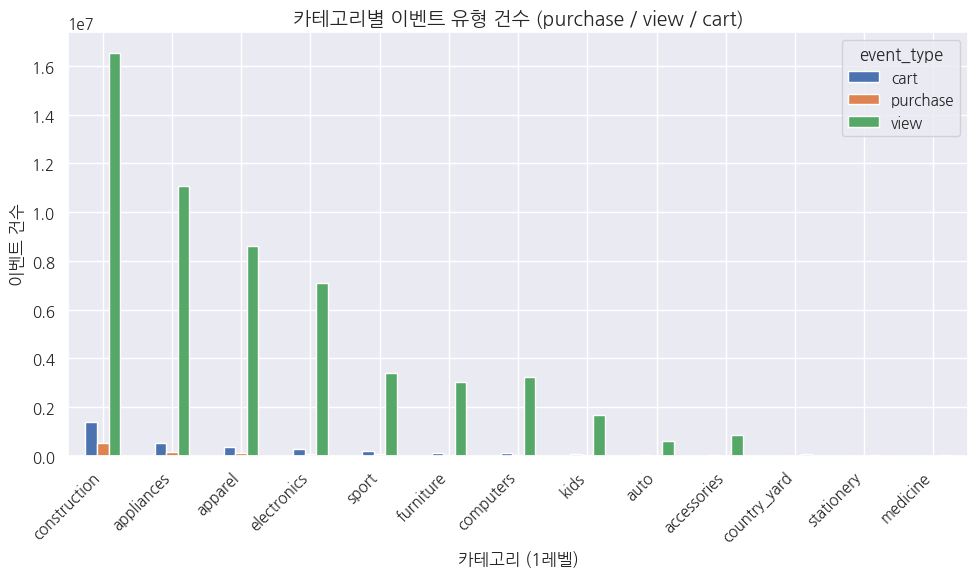

In [ ]:
import matplotlib.pyplot as plt

# Ïä§ÌÉÄÏùº Ï†ÅÏö©
fig, ax = plt.subplots(figsize=(10, 6))

# stacked bar chart (or use side-by-side if preferred)
category_event_counts.plot(kind='bar', stacked=False, ax=ax)

# Ï†úÎ™©/ÎùºÎ≤® ÏÑ§Ï†ï
ax.set_title('Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ Ïù¥Î≤§Ìä∏ Ïú†Ìòï Í±¥Ïàò (purchase / view / cart)', fontsize=14)
ax.set_xlabel('Ïπ¥ÌÖåÍ≥†Î¶¨ (1Î†àÎ≤®)', fontsize=12)
ax.set_ylabel('Ïù¥Î≤§Ìä∏ Í±¥Ïàò', fontsize=12)
ax.legend(title='event_type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### ÌèâÍ∑† Ïû¨Íµ¨Îß§ Í∞ÑÍ≤©

In [ ]:
# 1. Íµ¨Îß§ Ïù¥Î≤§Ìä∏Îßå Ï∂îÏ∂ú
df_buy = df[df['event_type'] == 'purchase'].copy()

# 2. ÏãúÍ∞ÑÏàú Ï†ïÎ†¨
df_buy.sort_values(by=['user_id', 'product_id', 'event_time'], inplace=True)

# 3. Ïù¥Ï†Ñ Íµ¨Îß§ ÏãúÍ∞Ñ Í≥ÑÏÇ∞
df_buy['prev_purchase_time'] = df_buy.groupby(['user_id', 'product_id'])['event_time'].shift(1)

# 4. Íµ¨Îß§ Í∞Ñ ÏãúÍ∞Ñ Ï∞®Ïù¥ Í≥ÑÏÇ∞ (Îã®ÏúÑ: Ïùº)
df_buy['repurchase_gap_days'] = (df_buy['event_time'] - df_buy['prev_purchase_time']).dt.total_seconds() / (60 * 60 * 24)


In [ ]:
df_repurchase = df_buy[df_buy['repurchase_gap_days'].notnull()]

In [ ]:
# Ï†ÑÏ≤¥ ÌèâÍ∑† Ïû¨Íµ¨Îß§ Ï£ºÍ∏∞
mean_gap = df_repurchase['repurchase_gap_days'].mean()

# Ïú†Ï†ÄÎ≥Ñ ÌèâÍ∑† Ïû¨Íµ¨Îß§ Í∞ÑÍ≤©
user_gap = df_repurchase.groupby('user_id')['repurchase_gap_days'].mean().reset_index()

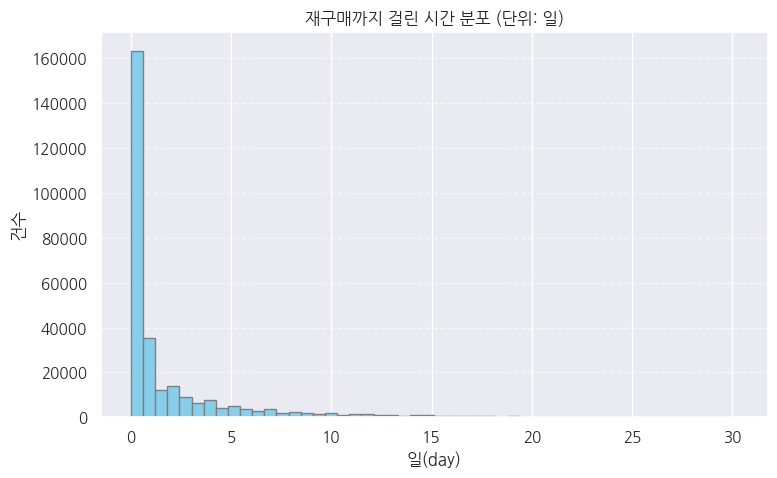

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df_repurchase['repurchase_gap_days'], bins=50, color='skyblue', edgecolor='gray')
plt.title('Ïû¨Íµ¨Îß§ÍπåÏßÄ Í±∏Î¶∞ ÏãúÍ∞Ñ Î∂ÑÌè¨ (Îã®ÏúÑ: Ïùº)')
plt.xlabel('Ïùº(day)')
plt.ylabel('Í±¥Ïàò')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Lv1 Ïπ¥ÌÖåÍ≥†Î¶¨Ïùò ÌèâÍ∑† Ïû¨Íµ¨Îß§ Í∏∞Í∞Ñ

In [ ]:
# 1. Íµ¨Îß§ Ïù¥Î≤§Ìä∏Îßå ÌïÑÌÑ∞ÎßÅ
df_buy = df[df['event_type'] == 'purchase'].copy()

# 2. ÏãúÍ∞ÑÏàú Ï†ïÎ†¨
df_buy.sort_values(by=['user_id', 'product_id', 'event_time'], inplace=True)

# 3. Ïù¥Ï†Ñ Íµ¨Îß§ ÏãúÍ∞Ñ
df_buy['prev_time'] = df_buy.groupby(['user_id', 'product_id'])['event_time'].shift(1)

# 4. Ïû¨Íµ¨Îß§ ÏãúÍ∞Ñ Ï∞®Ïù¥ Í≥ÑÏÇ∞ (Ïùº Îã®ÏúÑ)
df_buy['repurchase_gap_days'] = (df_buy['event_time'] - df_buy['prev_time']).dt.total_seconds() / (60 * 60 * 24)

# 5. Ïû¨Íµ¨Îß§Í∞Ä Ï°¥Ïû¨ÌïòÎäî Í≤ΩÏö∞Îßå ÌïÑÌÑ∞
df_repurchase = df_buy[df_buy['repurchase_gap_days'].notnull()]


In [ ]:
# category_lvl1 Í∏∞Ï§Ä ÌèâÍ∑†/Ï§ëÏïôÍ∞í Ïû¨Íµ¨Îß§Ïùº Í≥ÑÏÇ∞
category_gap = df_repurchase.groupby('category_lvl1')['repurchase_gap_days'].agg(['count', 'mean', 'median']).reset_index()

# Î≥¥Í∏∞ Ï¢ãÍ≤å Ï†ïÎ†¨
category_gap = category_gap.sort_values(by='mean')


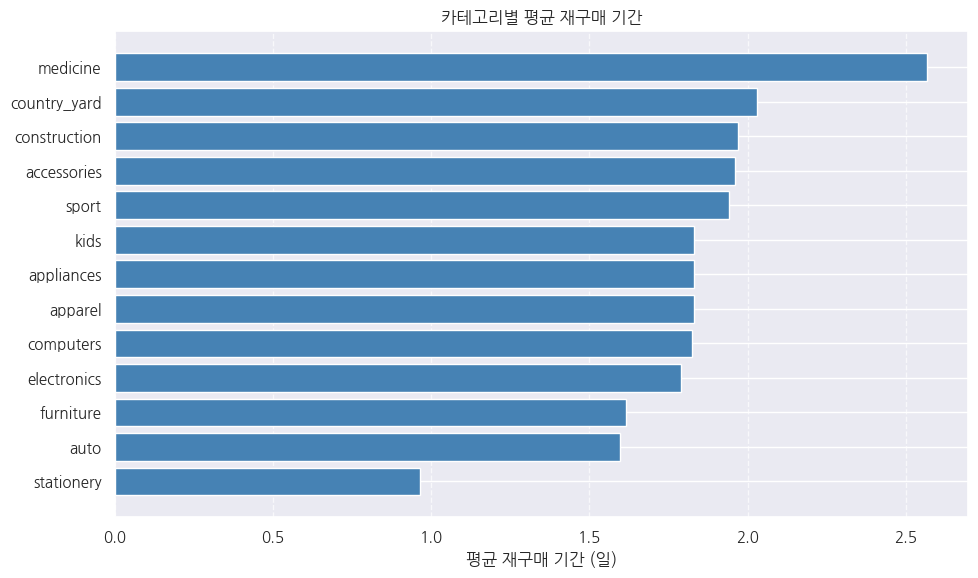

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(category_gap['category_lvl1'], category_gap['mean'], color='steelblue')
plt.xlabel('ÌèâÍ∑† Ïû¨Íµ¨Îß§ Í∏∞Í∞Ñ (Ïùº)')
plt.title('Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ ÌèâÍ∑† Ïû¨Íµ¨Îß§ Í∏∞Í∞Ñ')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### ÏÑ∏ÏÖòÎ≥Ñ Íµ¨Îß§Ïú®Î≥¥Í∏∞

In [ ]:
# ÏÑ∏ÏÖòÎãπ Íµ¨Îß§ Î∞úÏÉù Ïó¨Î∂Ä(True/False)
session_purchased = df.groupby('user_session')['event_type'].apply(lambda x: 'purchase' in x.values)

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Î≥ÄÌôò
session_purchased_df = session_purchased.reset_index().rename(columns={'event_type': 'has_purchase'})

In [ ]:
# Ï†ÑÌôòÎêú ÏÑ∏ÏÖò Ïàò
num_converted_sessions = session_purchased_df['has_purchase'].sum()

# Ï†ÑÏ≤¥ ÏÑ∏ÏÖò Ïàò
total_sessions = len(session_purchased_df)

# Ï†ÑÌôòÏú® Í≥ÑÏÇ∞
conversion_rate = num_converted_sessions / total_sessions * 100

print(f"Ï¥ù ÏÑ∏ÏÖò Ïàò: {total_sessions}")
print(f"Íµ¨Îß§ Ï†ÑÌôòÎêú ÏÑ∏ÏÖò Ïàò: {num_converted_sessions}")
print(f"ÏÑ∏ÏÖòÎãπ Íµ¨Îß§ Ï†ÑÌôòÏú®: {conversion_rate:.2f}%")


Ï¥ù ÏÑ∏ÏÖò Ïàò: 15581360
Íµ¨Îß§ Ï†ÑÌôòÎêú ÏÑ∏ÏÖò Ïàò: 970005
ÏÑ∏ÏÖòÎãπ Íµ¨Îß§ Ï†ÑÌôòÏú®: 6.23%


In [ ]:
# ÏÑ∏ÏÖòÎ≥Ñ Ï≤´ category_lvl1 Í∞í
session_main_category = df.sort_values(['user_session', 'event_time']) \
                          .drop_duplicates('user_session')[['user_session', 'category_lvl1']]

In [ ]:
# Î≥ëÌï©
session_stats = session_purchased_df.merge(session_main_category, on='user_session', how='left')

# Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ Ï†ÑÌôòÏú® Í≥ÑÏÇ∞
category_conversion = session_stats.groupby('category_lvl1')['has_purchase'].mean().sort_values(ascending=False) * 100


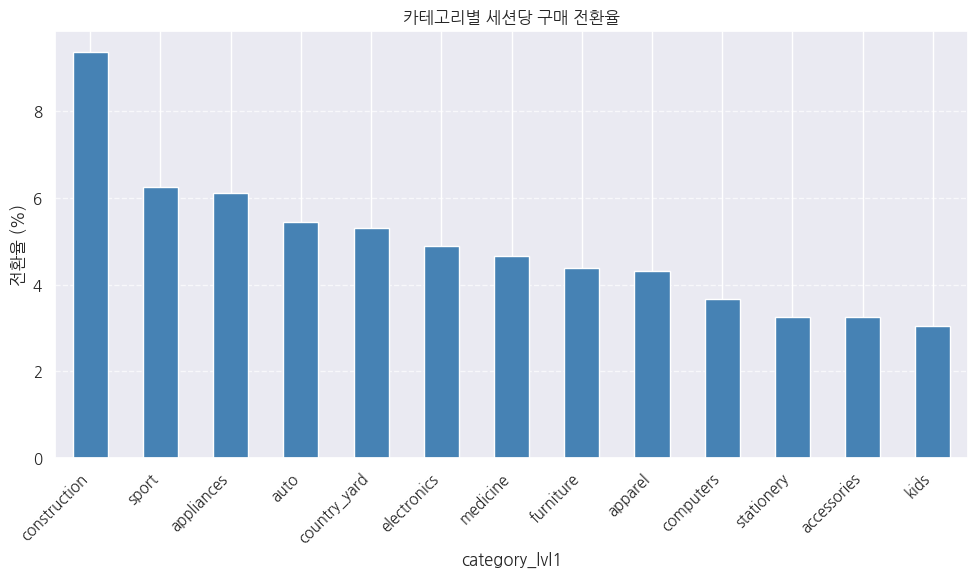

In [ ]:
plt.figure(figsize=(10,6))
category_conversion.plot(kind='bar', color='steelblue')
plt.ylabel('Ï†ÑÌôòÏú® (%)')
plt.title('Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ ÏÑ∏ÏÖòÎãπ Íµ¨Îß§ Ï†ÑÌôòÏú®')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


- Í±¥ÏÑ§/ÏûêÏû¨ Í¥ÄÎ†® Ï†úÌíàÍµ∞Ïù¥ Í∞ÄÏû• ÎÜíÏùÄ Ï†ÑÌôòÏú®ÏùÑ Î≥¥ÏûÑ(Î∞©Î¨∏ > Íµ¨Îß§Î°ú Ïù¥Ïñ¥Ïßà Í∞ÄÎä•ÏÑ± ÎÜíÏùå)
- Ïä§Ìè¨Ï∏†Ïö©Ìíà, Í∞ÄÏ†Ñ, ÏûêÎèôÏ∞®Ïö©ÌíàÏùÄ ÎπÑÍµêÏ†Å Ï†ÑÌôòÏö∏ ÎÜíÏùå
- electronics, medicine : ÌÉêÏÉâ/Î¶¨Î∑∞ ÎπÑÍµêÌïòÎäî Í≥ºÏ†ïÏù¥ ÎßéÏùå
- omputers, stationery, accessories, kids :ÎßéÏù¥ Î≥¥Í∏∞Îäî ÌïòÏßÄÎßå Íµ¨Îß§ Ï†ÑÌôòÏùÄ ÎÇÆÏùå

# Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ Ïû¨Íµ¨Îß§Ïú®Ïù¥ ÎÜíÏùÄ Î¨∏Íµ¨Î•òÎ•º Í∏∞Ï§ÄÏúºÎ°ú Ïû¨Íµ¨Îß§Ïú® ÌôïÏù∏
> Î¨∏Íµ¨Î•ò Íµ¨Îß§Ïûê Ï§ë Ïû¨Íµ¨Îß§Ìïú Ïú†Ï†Ä ÎπÑÏú® ÌôïÏù∏

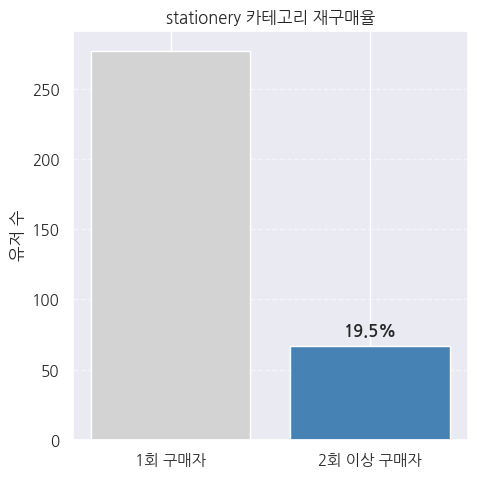

In [ ]:
# 1. Íµ¨Îß§ Ïù¥Î≤§Ìä∏ Ï§ë stationery Ïπ¥ÌÖåÍ≥†Î¶¨Îßå Ï∂îÏ∂ú
df_stationery_buy = df[(df['event_type'] == 'purchase') & (df['category_lvl1'] == 'stationery')].copy()

# 2. Ïú†Ï†ÄÎ≥Ñ Íµ¨Îß§ ÌöüÏàò Í≥ÑÏÇ∞
buy_counts = df_stationery_buy.groupby('user_id')['product_id'].count()

# 3. Ïû¨Íµ¨Îß§Ïûê ÎπÑÏú® Í≥ÑÏÇ∞
num_buyers = len(buy_counts)
num_repeat_buyers = (buy_counts >= 2).sum()
repurchase_rate = num_repeat_buyers / num_buyers * 100

# 4. ÏãúÍ∞ÅÌôî
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.bar(['1Ìöå Íµ¨Îß§Ïûê', '2Ìöå Ïù¥ÏÉÅ Íµ¨Îß§Ïûê'], [num_buyers - num_repeat_buyers, num_repeat_buyers], color=['lightgray', 'steelblue'])
plt.title('stationery Ïπ¥ÌÖåÍ≥†Î¶¨ Ïû¨Íµ¨Îß§Ïú®')
plt.ylabel('Ïú†Ï†Ä Ïàò')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.text(1, num_repeat_buyers + 5, f'{repurchase_rate:.1f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()


# Ïπ¥ÌÖåÍ≥†Î¶¨ Ï§ë ÏùºÎ∂Ä(Î¨∏Íµ¨Î•ò) Ïû•Î∞îÍµ¨Îãà Ï∂îÍ∞Ä -> Íµ¨Îß§ Ï†ÑÌôòÏú® ÎπÑÍµê

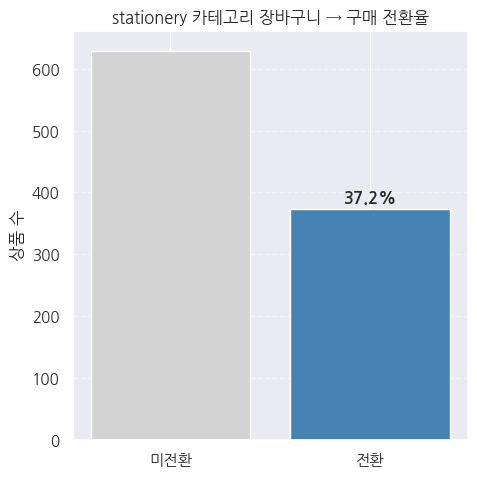

In [ ]:
# 1. stationery Í¥ÄÎ†® cart & purchase Ïù¥Î≤§Ìä∏ Ï∂îÏ∂ú
df_stationery = df[df['category_lvl1'] == 'stationery']

# 2. Ïú†Ï†ÄÎ≥ÑÎ°ú Ìï¥Îãπ Ï†úÌíàÏùÑ Ïû•Î∞îÍµ¨Îãà(cart) ‚Üí Íµ¨Îß§(purchase) ÌñàÎäîÏßÄ Ï≤¥ÌÅ¨
# user_id + product_id Í∏∞Ï§ÄÏúºÎ°ú cartÏôÄ purchase Ïó¨Î∂Ä ÌôïÏù∏
cart_df = df_stationery[df_stationery['event_type'] == 'cart'][['user_id', 'product_id']].drop_duplicates()
purchase_df = df_stationery[df_stationery['event_type'] == 'purchase'][['user_id', 'product_id']].drop_duplicates()

# 3. Ïû•Î∞îÍµ¨Îãà ÏÉÅÌíà Ï§ë Íµ¨Îß§Î°ú Ïù¥Ïñ¥ÏßÑ Í≤ΩÏö∞ Ï∂îÏ∂ú
cart_df['carted'] = 1
merged = cart_df.merge(purchase_df, on=['user_id', 'product_id'], how='left', indicator=True)
merged['purchased'] = (merged['_merge'] == 'both').astype(int)

# 4. Ï†ÑÌôòÏú® Í≥ÑÏÇ∞
cart_total = len(merged)
cart_to_purchase = merged['purchased'].sum()
conversion_rate = cart_to_purchase / cart_total * 100

# 5. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(5,5))
plt.bar(['ÎØ∏Ï†ÑÌôò', 'Ï†ÑÌôò'], [cart_total - cart_to_purchase, cart_to_purchase], color=['lightgray', 'steelblue'])
plt.title('stationery Ïπ¥ÌÖåÍ≥†Î¶¨ Ïû•Î∞îÍµ¨Îãà ‚Üí Íµ¨Îß§ Ï†ÑÌôòÏú®')
plt.ylabel('ÏÉÅÌíà Ïàò')
plt.text(1, cart_to_purchase + 5, f'{conversion_rate:.1f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# Ïú†Ï†Ä Ïú†ÌòïÎ≥Ñ ÎπÑÍµê

In [ ]:
# Íµ¨Îß§ Îç∞Ïù¥ÌÑ∞Îßå Ï∂îÏ∂ú
df_buy = df[df['event_type'] == 'purchase'].copy()

# ÏãúÍ∞Ñ Ïàú Ï†ïÎ†¨
df_buy = df_buy.sort_values(by=['user_id', 'product_id', 'event_time'])

# Ïú†Ï†Ä-ÏÉÅÌíàÎ≥Ñ Ïù¥Ï†Ñ Íµ¨Îß§ÏãúÍ∞Ñ Í≥ÑÏÇ∞
df_buy['prev_time'] = df_buy.groupby(['user_id', 'product_id'])['event_time'].shift(1)

# Ïû¨Íµ¨Îß§ Í∞ÑÍ≤© Í≥ÑÏÇ∞ (Ïùº Îã®ÏúÑ)
df_buy['repurchase_gap'] = (df_buy['event_time'] - df_buy['prev_time']).dt.total_seconds() / (60 * 60 * 24)

# Ïú†Ï†ÄÎ≥Ñ Ï¥ù Íµ¨Îß§ ÌöüÏàò Í≥ÑÏÇ∞
user_purchase_count = df_buy.groupby('user_id').size().rename('total_purchases')

# Ïú†Ï†ÄÎ≥Ñ Ïû¨Íµ¨Îß§ ÌöüÏàò (gapÏù¥ ÏûàÎäî Í≤ΩÏö∞Îßå)
user_repurchase_count = df_buy[df_buy['repurchase_gap'].notnull()].groupby('user_id').size().rename('repurchase_count')

# Ïú†Ï†ÄÎ≥Ñ ÌèâÍ∑† Ïû¨Íµ¨Îß§ Í∞ÑÍ≤©
user_repurchase_gap = df_buy[df_buy['repurchase_gap'].notnull()].groupby('user_id')['repurchase_gap'].mean().rename('avg_repurchase_gap')

# Î≥ëÌï©
user_summary = pd.concat([user_purchase_count, user_repurchase_count, user_repurchase_gap], axis=1).fillna(0)

# Ïú†Ï†Ä Ïú†Ìòï Î∂ÑÎ•ò (Ï¥ù Íµ¨Îß§ Í∏∞Ï§Ä)
def classify_user(n):
    if n == 1:
        return '1Ìöå Íµ¨Îß§Ïûê'
    elif 2 <= n <= 3:
        return '2~3Ìöå Íµ¨Îß§Ïûê'
    elif 4 <= n <= 6:
        return '4~6Ìöå Íµ¨Îß§Ïûê'
    else:
        return '7Ìöå Ïù¥ÏÉÅ Íµ¨Îß§Ïûê'

user_summary['user_type'] = user_summary['total_purchases'].apply(classify_user)

# Ïú†Ï†Ä Ïú†ÌòïÎ≥Ñ ÌèâÍ∑† Ïû¨Íµ¨Îß§ ÌöüÏàò Î∞è Í∞ÑÍ≤©
grouped_stats = user_summary.groupby('user_type')[['repurchase_count', 'avg_repurchase_gap']].mean()

# ÏàúÏÑú Ï†ïÎ†¨
user_type_order = ['1Ìöå Íµ¨Îß§Ïûê', '2~3Ìöå Íµ¨Îß§Ïûê', '4~6Ìöå Íµ¨Îß§Ïûê', '7Ìöå Ïù¥ÏÉÅ Íµ¨Îß§Ïûê']
grouped_stats = grouped_stats.loc[user_type_order]


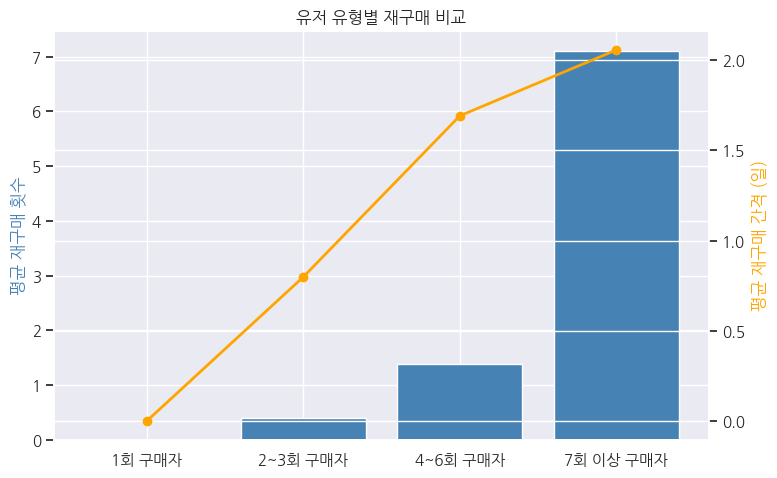

In [ ]:
fig, ax1 = plt.subplots(figsize=(8,5))

# ÎßâÎåÄ: ÌèâÍ∑† Ïû¨Íµ¨Îß§ ÌöüÏàò
ax1.bar(grouped_stats.index, grouped_stats['repurchase_count'], color='steelblue', label='Ïû¨Íµ¨Îß§ ÌöüÏàò')
ax1.set_ylabel('ÌèâÍ∑† Ïû¨Íµ¨Îß§ ÌöüÏàò', color='steelblue')

# ÏÑ†: ÌèâÍ∑† Ïû¨Íµ¨Îß§ Í∞ÑÍ≤© (Ïò§Î•∏Ï™Ω YÏ∂ï)
ax2 = ax1.twinx()
ax2.plot(grouped_stats.index, grouped_stats['avg_repurchase_gap'], color='orange', marker='o', linewidth=2, label='Ïû¨Íµ¨Îß§ Í∞ÑÍ≤©')
ax2.set_ylabel('ÌèâÍ∑† Ïû¨Íµ¨Îß§ Í∞ÑÍ≤© (Ïùº)', color='orange')

plt.title('Ïú†Ï†Ä Ïú†ÌòïÎ≥Ñ Ïû¨Íµ¨Îß§ ÎπÑÍµê')
fig.tight_layout()
plt.show()


- Íµ¨Îß§ ÌöüÏàòÍ∞Ä ÎßéÏùÑÏàòÎ°ù Ïû¨Íµ¨Îß§ÎèÑ ÎßéÏùå
- ÌèâÍ∑† Ïû¨Íµ¨Îß§ Í∞ÑÍ≤©ÏùÄ Íµ¨Îß§Í∞Ä ÎßéÏùÑÏàòÎ°ù Ïò§ÌûàÎ†§ Í∏∏Ïñ¥ÏßÄÎäî Í≤ΩÌñ•ÏùÑ Î≥¥ÏûÑ -> Ï†ïÍ∏∞Ï†Å ÏÜåÎπÑÏûêÏùº Í∞ÄÎä•ÏÑ± ÏûàÏùå

In [ ]:
# 1. Íµ¨Îß§ Ïù¥Î≤§Ìä∏ ÌïÑÌÑ∞
df_buy = df[df['event_type'] == 'purchase'].copy()

# 2. Ïú†Ï†ÄÎ≥Ñ Ï¥ù Íµ¨Îß§ ÌöüÏàò
user_total = df_buy.groupby('user_id').size().rename('total_purchases')

# 3. Ïú†Ï†Ä Ïú†Ìòï Î∂ÑÎ•ò Ìï®Ïàò
def classify_user(n):
    if n == 1:
        return '1Ìöå Íµ¨Îß§Ïûê'
    elif 2 <= n <= 3:
        return '2~3Ìöå Íµ¨Îß§Ïûê'
    elif 4 <= n <= 6:
        return '4~6Ìöå Íµ¨Îß§Ïûê'
    else:
        return '7Ìöå Ïù¥ÏÉÅ Íµ¨Îß§Ïûê'

# 4. Ïú†Ï†Ä Ïú†Ìòï Î∂ÄÏó¨
user_type_df = user_total.reset_index()
user_type_df['user_type'] = user_type_df['total_purchases'].apply(classify_user)


In [ ]:
# Íµ¨Îß§ Î°úÍ∑∏Ïóê user_type Ï∂îÍ∞Ä
df_buy = df_buy.merge(user_type_df[['user_id', 'user_type']], on='user_id', how='left')


In [ ]:
# Ïú†Ï†Ä Ïú†ÌòïÎ≥Ñ category_lvl1Î≥Ñ Íµ¨Îß§ ÌöüÏàò
category_pref = df_buy.groupby(['user_type', 'category_lvl1']).size().reset_index(name='count')


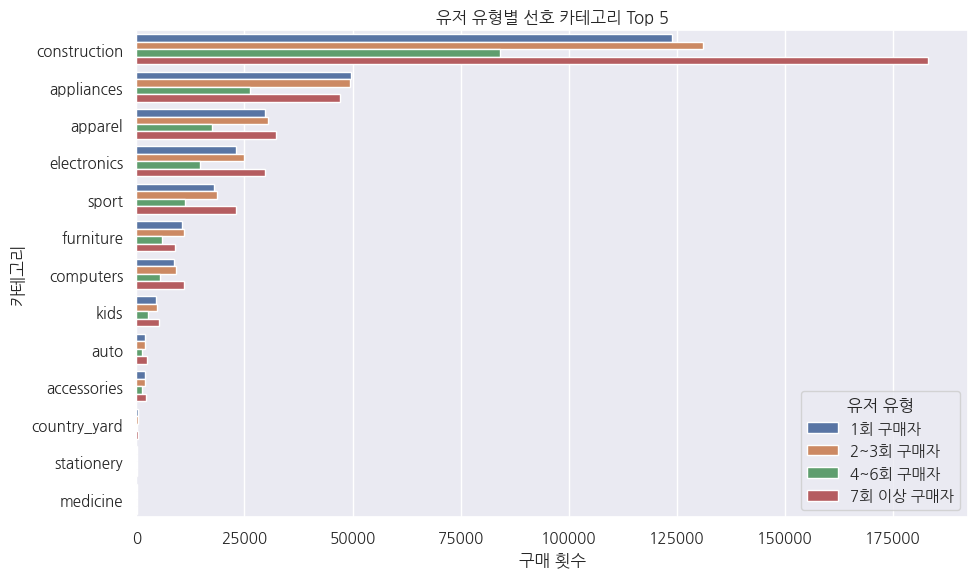

In [ ]:
# ÏÉÅÏúÑ 5Í∞ú Ïπ¥ÌÖåÍ≥†Î¶¨Îßå Ï∂îÏ∂ú (Ïú†ÌòïÎ≥ÑÎ°ú)
top5_per_type = (
    category_pref
    .sort_values(['user_type', 'count'], ascending=[True, False])
    .groupby('user_type')
    .head(20)
)

plt.figure(figsize=(10, 6))
sns.barplot(data=top5_per_type, x='count', y='category_lvl1', hue='user_type')
plt.title('Ïú†Ï†Ä Ïú†ÌòïÎ≥Ñ ÏÑ†Ìò∏ Ïπ¥ÌÖåÍ≥†Î¶¨ Top 5')
plt.xlabel('Íµ¨Îß§ ÌöüÏàò')
plt.ylabel('Ïπ¥ÌÖåÍ≥†Î¶¨')
plt.legend(title='Ïú†Ï†Ä Ïú†Ìòï')
plt.tight_layout()
plt.show()


- 1Ìöå Íµ¨Îß§Ïûê: construction ÏßÑÏûÖ ÎßéÏùå ‚Üí Ï≤´ Íµ¨Îß§ Ïù¥ÌõÑ 7Ïùº Ïù¥ÎÇ¥ Ïû¨Íµ¨Îß§ Ïú†ÎèÑ
- 2~3Ìöå Íµ¨Îß§Ïûê:	apparel, appliancesÎ°ú ÌôïÏû• ‚Üí Í∞úÏù∏Ìôî Ï∂îÏ≤ú Ìö®Í≥ºÏ†Å
- 4~6Ìöå Íµ¨Îß§Ïûê:	electronics, sport ÏßÑÏûÖ ÏãúÏûë ‚Üí Ï§ëÍ≥†Í∞Ä Ï†úÌíà Ï∂îÏ≤ú Í∞ÄÎä•
- 7Ìöå Ïù¥ÏÉÅ:	Ï∂©ÏÑ± Í≥†Í∞ù, Î∞òÎ≥µ Íµ¨Îß§ Ï§ëÏã¨ ‚Üí Ï†ïÍ∏∞Î∞∞ÏÜ°, ÏÑ∏Ìä∏ ÏÉÅÌíà, Ï†ÅÎ¶Ω ÌòúÌÉù Í∞ïÌôî

In [ ]:
# ÏÑ∏ÏÖòÎ≥Ñ Ìè¨Ìï®Îêú Ïù¥Î≤§Ìä∏ ÌîåÎûòÍ∑∏ ÏÉùÏÑ±
session_event_flags = df.pivot_table(index='user_session', columns='event_type',
                                     values='user_id', aggfunc='count', fill_value=0)

# Ìè¨Ìï® Ïó¨Î∂ÄÎßå Ï∂îÏ∂ú (0/1)
session_event_flags = (session_event_flags > 0).astype(int)

# ÌçºÎÑê Îã®Í≥ÑÎ≥Ñ Ïàò
funnel_counts = {
    'view': session_event_flags['view'].sum(),
    'cart': session_event_flags[session_event_flags['view'] == 1]['cart'].sum(),
    'purchase': session_event_flags[session_event_flags['cart'] == 1]['purchase'].sum()
}

# Ï†ÑÌôòÏú® Í≥ÑÏÇ∞
funnel_rates = {
    'view ‚Üí cart': funnel_counts['cart'] / funnel_counts['view'] * 100,
    'cart ‚Üí purchase': funnel_counts['purchase'] / funnel_counts['cart'] * 100
}

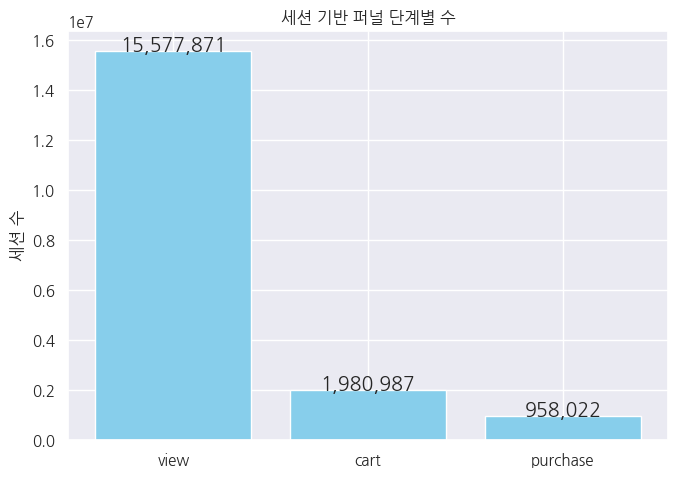

In [ ]:
stages = list(funnel_counts.keys())
counts = list(funnel_counts.values())
rates = list(funnel_rates.values())

plt.figure(figsize=(7,5))
plt.bar(stages, counts, color='skyblue')
for i, val in enumerate(counts):
    plt.text(i, val + 1000, f'{val:,}', ha='center')
plt.title('ÏÑ∏ÏÖò Í∏∞Î∞ò ÌçºÎÑê Îã®Í≥ÑÎ≥Ñ Ïàò')
plt.ylabel('ÏÑ∏ÏÖò Ïàò')
plt.tight_layout()
plt.show()


### Ïû•Î∞îÍµ¨Îãà -> Íµ¨Îß§ Ï†ÑÌôòÏú®

In [ ]:
# user_id + product_id Í∏∞Ï§ÄÏúºÎ°ú cart, purchase Ïó¨Î∂Ä ÌôïÏù∏
cart_items = df[df['event_type'] == 'cart'][['user_id', 'product_id']].drop_duplicates()
purchase_items = df[df['event_type'] == 'purchase'][['user_id', 'product_id']].drop_duplicates()

# Î≥ëÌï© ÌõÑ Ï†ÑÌôò Ïó¨Î∂Ä ÌôïÏù∏
cart_items['in_cart'] = 1
merged = cart_items.merge(purchase_items, on=['user_id', 'product_id'], how='left', indicator=True)
merged['converted'] = (merged['_merge'] == 'both').astype(int)

# Ï†ÑÌôòÏú® Í≥ÑÏÇ∞
cart_total = len(merged)
cart_converted = merged['converted'].sum()
cart_conversion_rate = cart_converted / cart_total * 100

print(f'Ïû•Î∞îÍµ¨Îãà ‚Üí Íµ¨Îß§ Ï†ÑÌôòÏú®: {cart_conversion_rate:.2f}%')


Ïû•Î∞îÍµ¨Îãà ‚Üí Íµ¨Îß§ Ï†ÑÌôòÏú®: 48.79%


### ÏãúÍ∞ÑÎåÄÎ≥Ñ Ïû¨Íµ¨Îß§ Í±¥Ïàò

In [ ]:
# 1. Íµ¨Îß§ Ïù¥Î≤§Ìä∏Îßå ÌïÑÌÑ∞ÎßÅ
df_buy = df[df['event_type'] == 'purchase'].copy()

# 2. ÏãúÍ∞ÑÏàú Ï†ïÎ†¨
df_buy = df_buy.sort_values(by=['user_id', 'product_id', 'event_time'])

# 3. Ïù¥Ï†Ñ Íµ¨Îß§ ÏãúÍ∞Ñ ÏÉùÏÑ±
df_buy['prev_time'] = df_buy.groupby(['user_id', 'product_id'])['event_time'].shift(1)

# 4. Ïû¨Íµ¨Îß§Îßå Ï∂îÏ∂ú (prev_timeÏù¥ Ï°¥Ïû¨)
df_repurchase = df_buy[df_buy['prev_time'].notnull()].copy()

# 5. Ïû¨Íµ¨Îß§ Î∞úÏÉù ÏãúÍ∞ÑÏóêÏÑú ÏãúÍ∞ÑÎåÄ(hour) Ï∂îÏ∂ú
df_repurchase['event_hour'] = df_repurchase['event_time'].dt.hour


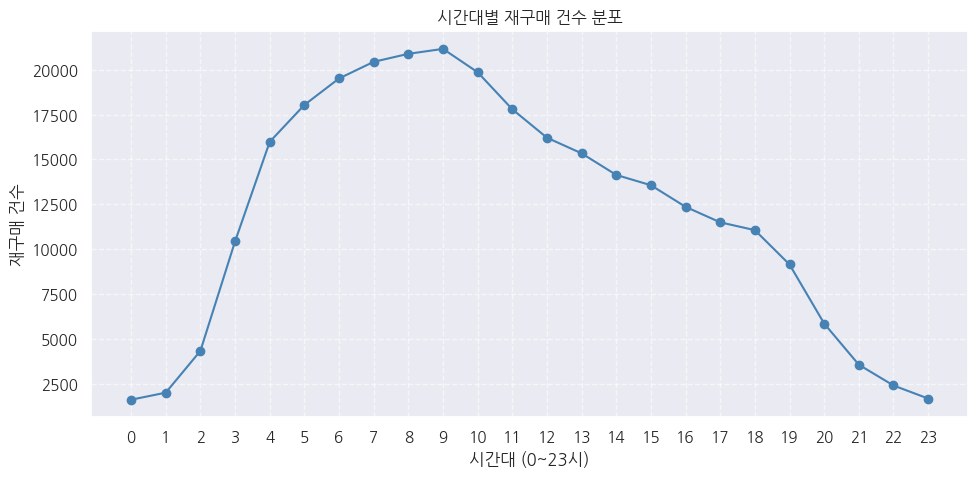

In [ ]:
# 6. ÏãúÍ∞ÑÎåÄÎ≥Ñ Ïû¨Íµ¨Îß§ Ïàò
hourly_repurchase = df_repurchase['event_hour'].value_counts().sort_index()

# 7. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10,5))
plt.plot(hourly_repurchase.index, hourly_repurchase.values, marker='o', color='steelblue')
plt.xticks(range(0, 24))
plt.title('ÏãúÍ∞ÑÎåÄÎ≥Ñ Ïû¨Íµ¨Îß§ Í±¥Ïàò Î∂ÑÌè¨')
plt.xlabel('ÏãúÍ∞ÑÎåÄ (0~23Ïãú)')
plt.ylabel('Ïû¨Íµ¨Îß§ Í±¥Ïàò')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
df

event_time event_type  product_id  \
0        2019-12-01 00:00:00+00:00       view     1005105   
1        2019-12-01 00:00:00+00:00       view    22700068   
2        2019-12-01 00:00:01+00:00       view     2402273   
3        2019-12-01 00:00:02+00:00   purchase    26400248   
4        2019-12-01 00:00:02+00:00       view    20100164   
...                            ...        ...         ...   
67542873 2019-12-31 23:59:58+00:00       view     1005118   
67542874 2019-12-31 23:59:58+00:00       view     1307229   
67542875 2019-12-31 23:59:59+00:00       view     9300104   
67542876 2019-12-31 23:59:59+00:00       view     4803759   
67542877 2019-12-31 23:59:59+00:00       view     1005132   

                  category_id                  category_code   brand    price  \
0         2232732093077520756       construction.tools.light   apple  1302.48   
1         2232732091643068746                            NaN   force   102.96   
2         2232732100769874463   appliances.personal.massager   bosch   313.52   
3         2053013553056579841  computers.peripherals.printer     NaN   132.31   
4         2232732110089618156               apparel.trousers    nika   101.68   
...                       ...                            ...     ...      ...   
67542873  2232732093077520756       construction.tools.light   apple   908.80   
67542874  2053013554658804075    electronics.audio.headphone  lenovo  1044.25   
67542875  2053013554524586339                     kids.dolls    sony   411.83   
67542876  2232732079706079299                  sport.bicycle  xiaomi    17.99   
67542877  2232732093077520756       construction.tools.light   apple  1276.76   

            user_id                          user_session event_date  \
0         556695836  ca5eefc5-11f9-450c-91ed-380285a0bc80 2019-12-01   
1         577702456  de33debe-c7bf-44e8-8a12-3bf8421f842a 2019-12-01   
2         539453785  5ee185a7-0689-4a33-923d-ba0130929a76 2019-12-01   
3         535135317  61792a26-672f-4e61-9832-7b63bb1714db 2019-12-01   
4         517987650  906c6ca8-ff5c-419a-bde9-967ba8e2233e 2019-12-01   
...             ...                                   ...        ...   
67542873  515771654  06ed2ab3-39f6-4fd4-a755-3a26c72eabc8 2019-12-31   
67542874  595160289  c3b5e44a-b97d-44ce-bdfc-d4f8ff669ac0 2019-12-31   
67542875  526621231  7da1da5a-0d1e-4768-b481-97354e2ef28e 2019-12-31   
67542876  574723072  2f967c6e-b6c4-4971-8599-d34f86570e29 2019-12-31   
67542877  595117926  e6987784-2204-425e-b674-213916741f58 2019-12-31   

          event_hour category_lvl1 category_lvl2 category_lvl3 category_lvl4  
0                  0  construction         tools         light          None  
1                  0           NaN           NaN           NaN           NaN  
2                  0    appliances      personal      massager          None  
3                  0     computers   peripherals       printer          None  
4                  0       apparel      trousers          None          None  
...              ...           ...           ...           ...           ...  
67542873          23  construction         tools         light          None  
67542874          23   electronics         audio     headphone          None  
67542875          23          kids         dolls          None          None  
67542876          23         sport       bicycle          None          None  
67542877          23  construction         tools         light          None  

[67542878 rows x 15 columns]

In [ ]:
purchase_df.groupby('user_id')['event_time'].max().reset_index()

user_id                event_time
0       128968633 2019-12-31 15:30:09+00:00
1       136662675 2019-12-13 09:00:26+00:00
2       145611266 2019-12-24 05:09:33+00:00
3       177507559 2019-12-04 04:35:17+00:00
4       200985178 2019-12-29 23:42:08+00:00
...           ...                       ...
500992  595334048 2019-12-31 16:54:57+00:00
500993  595334075 2019-12-31 17:00:48+00:00
500994  595334812 2019-12-31 16:55:09+00:00
500995  595334982 2019-12-31 16:59:26+00:00
500996  595336069 2019-12-31 17:00:12+00:00

[500997 rows x 2 columns]

In [7]:
# Í∏∞Ï§ÄÏùº ÏÑ§Ï†ï
N = 31

# Íµ¨Îß§ Ïù¥Î≤§Ìä∏Îßå Ï∂îÏ∂ú
purchase_df = df[df['event_type'] == 'purchase'].copy()

# Ïú†Ï†ÄÎ≥Ñ ÎßàÏßÄÎßâ Íµ¨Îß§Ïùº Í≥ÑÏÇ∞
latest_purchase = purchase_df.groupby('user_id')['event_time'].max().reset_index()

# Í∏∞Ï§ÄÏùºÎ°úÎ∂ÄÌÑ∞ Í≤ΩÍ≥ºÏùº Í≥ÑÏÇ∞
latest_purchase['days_since_last_purchase'] = (df['event_time'].max() - latest_purchase['event_time']).dt.days

# NÏùº Ïù¥ÏÉÅ ÎØ∏Íµ¨Îß§Ìïú Í≥†Í∞ù ÌïÑÌÑ∞ÎßÅ
retarget_users = latest_purchase[latest_purchase['days_since_last_purchase'] >= N]

# Í≤∞Í≥º Ï∂úÎ†•
print(f"üìå {N}Ïùº Ïù¥ÏÉÅ ÎØ∏Íµ¨Îß§ Í≥†Í∞ù Ïàò: {len(retarget_users):,}Î™Ö")


üìå 31Ïùº Ïù¥ÏÉÅ ÎØ∏Íµ¨Îß§ Í≥†Í∞ù Ïàò: 0Î™Ö


In [8]:
# 1. Íµ¨Îß§ Ïù¥Î≤§Ìä∏Îßå Ï∂îÏ∂ú
df_purchase = df[df['event_type'] == 'purchase'].copy()

# 2. Ïú†Ï†ÄÎ≥Ñ Íµ¨Îß§ Í∏∞Î°ùÏùÑ ÏãúÍ∞ÑÏàú Ï†ïÎ†¨
df_purchase = df_purchase.sort_values(by=['user_id', 'event_time'])

# 3. Îã§Ïùå Íµ¨Îß§Ïùº Í≥ÑÏÇ∞ (Îã§Ïùå Íµ¨Îß§Í∞Ä ÏóÜÏúºÎ©¥ NaT)
df_purchase['next_purchase'] = df_purchase.groupby('user_id')['event_time'].shift(-1)

# 4. Îã§Ïùå Íµ¨Îß§ÍπåÏßÄ Í±∏Î¶∞ Ïùº Ïàò
df_purchase['gap_days'] = (df_purchase['next_purchase'] - df_purchase['event_time']).dt.days

# 5. Îã§Ïùå Íµ¨Îß§ÍπåÏßÄ 30Ïùº ÎÑòÍ≤å Í±∏Î¶¨Í±∞ÎÇò, ÏïÑÏòà Îã§Ïùå Íµ¨Îß§Í∞Ä ÏóÜÎäî Í≤ΩÏö∞Îßå ÌïÑÌÑ∞
mask = (df_purchase['gap_days'].isna()) | (df_purchase['gap_days'] > 30)
no_repurchase_users = df_purchase[mask]['user_id'].unique()

# 6. Í≤∞Í≥º Ï∂úÎ†•
print(f'üìå ÎßàÏßÄÎßâ Íµ¨Îß§ ÌõÑ 30Ïùº Ïù¥ÏÉÅ Ï∂îÍ∞Ä Íµ¨Îß§Í∞Ä ÏóÜÎäî Ïú†Ï†Ä Ïàò: {len(no_repurchase_users):,}Î™Ö')


üìå ÎßàÏßÄÎßâ Íµ¨Îß§ ÌõÑ 30Ïùº Ïù¥ÏÉÅ Ï∂îÍ∞Ä Íµ¨Îß§Í∞Ä ÏóÜÎäî Ïú†Ï†Ä Ïàò: 359,105Î™Ö


In [9]:
# ÎßàÏßÄÎßâ Íµ¨Îß§ÏôÄ Ïû¨Íµ¨Îß§ Ïàò Í≥ÑÏÇ∞
user_repurchase_count = purchase_df.sort_values(['user_id', 'product_id', 'event_time'])
user_repurchase_count['prev_time'] = user_repurchase_count.groupby(['user_id', 'product_id'])['event_time'].shift(1)
user_repurchase_count = user_repurchase_count[user_repurchase_count['prev_time'].notnull()]

# Ïú†Ï†ÄÎ≥Ñ Ïû¨Íµ¨Îß§ ÌöüÏàò
repurchase_cnt = user_repurchase_count.groupby('user_id').size().rename('repurchase_count')

# Î≥ëÌï©
retarget_users = retarget_users.merge(repurchase_cnt, on='user_id', how='left').fillna(0)

# ÏÑ†Ìò∏ Ïπ¥ÌÖåÍ≥†Î¶¨ Ï∂îÏ∂ú (Í∞ÄÏû• ÎßéÏù¥ Íµ¨Îß§Ìïú category_lvl1)
user_main_category = purchase_df.groupby('user_id')['category_lvl1'] \
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

retarget_users = retarget_users.merge(user_main_category, on='user_id', how='left')

# ÎØ∏Î¶¨Î≥¥Í∏∞
retarget_users.head()


Empty DataFrame
Columns: [user_id, event_time, days_since_last_purchase, repurchase_count, category_lvl1]
Index: []

### Í±¥ÏÑ§ Ïπ¥ÌÖåÍ≥†Î¶¨ Íµ¨Îß§ ÏãúÍ∞ÑÎåÄ ÌôïÏù∏ÌïòÍ∏∞

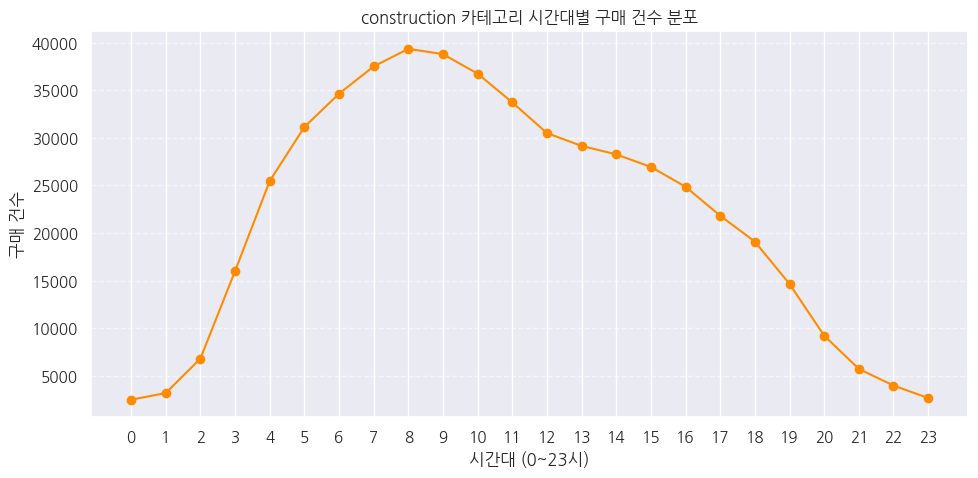

In [ ]:
# 1. Íµ¨Îß§ + construction Ïπ¥ÌÖåÍ≥†Î¶¨Îßå ÌïÑÌÑ∞
df_construction = df[
    (df['event_type'] == 'purchase') &
    (df['category_lvl1'] == 'construction')
].copy()

# 2. Íµ¨Îß§ ÏãúÍ∞ÑÎåÄ Ï∂îÏ∂ú
df_construction['event_hour'] = df_construction['event_time'].dt.hour

# 3. ÏãúÍ∞ÑÎåÄÎ≥Ñ Í±¥Ïàò ÏßëÍ≥Ñ
hourly_counts = df_construction['event_hour'].value_counts().sort_index()

# 4. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10,5))
plt.plot(hourly_counts.index, hourly_counts.values, marker='o', color='darkorange')
plt.title('construction Ïπ¥ÌÖåÍ≥†Î¶¨ ÏãúÍ∞ÑÎåÄÎ≥Ñ Íµ¨Îß§ Í±¥Ïàò Î∂ÑÌè¨')
plt.xlabel('ÏãúÍ∞ÑÎåÄ (0~23Ïãú)')
plt.ylabel('Íµ¨Îß§ Í±¥Ïàò')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [10]:
# user_idÎ≥Ñ Íµ¨Îß§ ÌöüÏàò Í≥ÑÏÇ∞
purchase_counts = purchase_df.groupby('user_id').size().reset_index(name='purchase_count')

# Ï†ïÌôïÌûà 1ÌöåÎßå Íµ¨Îß§Ìïú Ïú†Ï†Ä ÌïÑÌÑ∞ÎßÅ
one_time_buyers = purchase_counts[purchase_counts['purchase_count'] == 1]

# Í≤∞Í≥º Ï∂úÎ†•
print(f"üéØ Ìïú Î≤àÎßå Íµ¨Îß§Ìïú Í≥†Í∞ù Ïàò: {len(one_time_buyers)}Î™Ö")

üéØ Ìïú Î≤àÎßå Íµ¨Îß§Ìïú Í≥†Í∞ù Ïàò: 219822Î™Ö


In [11]:
# 1. Íµ¨Îß§ Ïù¥Î≤§Ìä∏Îßå Ï∂îÏ∂ú
purchase_df = df[df['event_type'] == 'purchase'].copy()

# 2. user_idÎ≥Ñ Íµ¨Îß§ ÌöüÏàò Í≥ÑÏÇ∞
purchase_counts = purchase_df.groupby('user_id').size().reset_index(name='purchase_count')

# 3. Ï†ïÌôïÌûà 1Ìöå Íµ¨Îß§Ìïú Ïú†Ï†Ä Ï∂îÏ∂ú
one_time_buyers = purchase_counts[purchase_counts['purchase_count'] == 1]

# 4. Íµ¨Îß§ 1Ìöå Ïú†Ï†ÄÏùò Íµ¨Îß§ Î°úÍ∑∏Îßå Ï∂îÏ∂ú
one_time_purchase_df = purchase_df[purchase_df['user_id'].isin(one_time_buyers['user_id'])].copy()

# 5. user_id Ï§ëÎ≥µ Ïó¨Î∂Ä ÌôïÏù∏
has_duplicates = one_time_purchase_df['user_id'].duplicated().any()

# 6. Í≤∞Í≥º Ï∂úÎ†•
print(f"üéØ Ìïú Î≤àÎßå Íµ¨Îß§Ìïú Í≥†Í∞ù Ïàò: {len(one_time_buyers):,}Î™Ö")
print(f"‚úÖ Ï§ëÎ≥µ user_id Ï°¥Ïû¨ Ïó¨Î∂Ä: {has_duplicates}")


üéØ Ìïú Î≤àÎßå Íµ¨Îß§Ìïú Í≥†Í∞ù Ïàò: 219,822Î™Ö
‚úÖ Ï§ëÎ≥µ user_id Ï°¥Ïû¨ Ïó¨Î∂Ä: False


In [12]:
one_time_purchase_df


event_time event_type  product_id  \
146033   2020-01-01 05:53:53+00:00   purchase     1005105   
146115   2020-01-01 05:53:57+00:00   purchase     4600552   
146587   2020-01-01 05:54:23+00:00   purchase   100038678   
146995   2020-01-01 05:54:45+00:00   purchase    10900328   
147627   2020-01-01 05:55:17+00:00   purchase     1802005   
...                            ...        ...         ...   
55966157 2020-01-31 23:55:35+00:00   purchase     3900739   
55966176 2020-01-31 23:55:39+00:00   purchase     1004767   
55966547 2020-01-31 23:57:33+00:00   purchase    17301779   
55966604 2020-01-31 23:57:52+00:00   purchase    26300086   
55966656 2020-01-31 23:58:08+00:00   purchase   100013136   

                  category_id                      category_code     brand  \
146033    2232732093077520756           construction.tools.light     apple   
146115    2053013557385101831      appliances.kitchen.dishwasher     bosch   
146587    2053013555631882655             electronics.smartphone     apple   
146995    2232732105912091273           appliances.kitchen.mixer  dauscher   
147627    2232732099754852875       appliances.personal.massager        lg   
...                       ...                                ...       ...   
55966157  2053013557452210699                 electronics.clocks     haier   
55966176  2232732093077520756           construction.tools.light   samsung   
55966547  2232732098446229999              apparel.shoes.sandals       NaN   
55966604  2053013554725912943  appliances.kitchen.coffee_grinder   lucente   
55966656  2053013558752445019        auto.accessories.compressor       NaN   

            price    user_id                          user_session event_date  \
146033    1275.16  595461654  1a88068f-d832-467d-a867-b9dfdd3da7a3 2020-01-01   
146115     679.53  520404769  9949d083-6c64-4188-9ce5-f90e77b4645a 2020-01-01   
146587     348.79  587025007  807b3ca1-5670-4e3d-8f24-5dfed4ee46f1 2020-01-01   
146995      15.42  594453674  cbea3fc9-b9f6-43a5-8749-a28f031e8c6b 2020-01-01   
147627     434.76  566691545  f30ca250-6aed-4fd3-b2fb-c2ac5845712b 2020-01-01   
...           ...        ...                                   ...        ...   
55966157    77.20  516186220  5ccbe2cf-a4d7-45df-8f2c-dbec3277e140 2020-01-31   
55966176   226.18  608821433  492f133c-604c-4569-9734-3a94c9af6f4a 2020-01-31   
55966547    18.16  514305364  2023c66f-f447-46cc-bb37-0788783c2c7f 2020-01-31   
55966604   237.84  514851004  0ec4ad95-7847-426f-aa1e-bb52e783dea7 2020-01-31   
55966656   305.03  514703063  c28543ae-3cd1-4fda-ac2e-8a6c6d16ae65 2020-01-31   

          event_hour category_lvl1 category_lvl2   category_lvl3 category_lvl4  
146033             5  construction         tools           light          None  
146115             5    appliances       kitchen      dishwasher          None  
146587             5   electronics    smartphone            None          None  
146995             5    appliances       kitchen           mixer          None  
147627             5    appliances      personal        massager          None  
...              ...           ...           ...             ...           ...  
55966157          23   electronics        clocks            None          None  
55966176          23  construction         tools           light          None  
55966547          23       apparel         shoes         sandals          None  
55966604          23    appliances       kitchen  coffee_grinder          None  
55966656          23          auto   accessories      compressor          None  

[219822 rows x 15 columns]

In [13]:
one_time_purchase_df.to_csv('/content/drive/MyDrive/Colab Notebooks/·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö•·Ñê·Ö©·Ü´/data/·Ñí·Ö°·Ü´·Ñá·Ö•·Ü´·ÑÜ·Ö°·Ü´·ÑÄ·ÖÆ·ÑÜ·Ö¢·Ñí·Ö°·Ü´_·ÑÄ·Ö©·ÑÄ·Ö¢·Ü®·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö•/one_time_purchase_users_01.csv', index=False)


In [14]:
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö•·Ñê·Ö©·Ü´/data/·Ñí·Ö°·Ü´·Ñá·Ö•·Ü´·ÑÜ·Ö°·Ü´·ÑÄ·ÖÆ·ÑÜ·Ö¢·Ñí·Ö°·Ü´_·ÑÄ·Ö©·ÑÄ·Ö¢·Ü®·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö•/one_time_purchase_users_12.csv')
test2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö•·Ñê·Ö©·Ü´/data/·Ñí·Ö°·Ü´·Ñá·Ö•·Ü´·ÑÜ·Ö°·Ü´·ÑÄ·ÖÆ·ÑÜ·Ö¢·Ñí·Ö°·Ü´_·ÑÄ·Ö©·ÑÄ·Ö¢·Ü®·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö•/one_time_purchase_users_01.csv')
df_concat = pd.concat([test, test2], ignore_index=True)
df_concat

event_time event_type  product_id          category_id  \
0       2019-12-01 00:00:39+00:00   purchase     1004739  2232732093077520756   
1       2019-12-01 00:02:01+00:00   purchase     1005003  2232732093077520756   
2       2019-12-01 00:04:40+00:00   purchase     1002633  2053013555631882655   
3       2019-12-01 00:04:44+00:00   purchase     1005115  2232732093077520756   
4       2019-12-01 00:08:46+00:00   purchase    20100310  2232732110089618156   
...                           ...        ...         ...                  ...   
519969  2020-01-31 23:55:35+00:00   purchase     3900739  2053013557452210699   
519970  2020-01-31 23:55:39+00:00   purchase     1004767  2232732093077520756   
519971  2020-01-31 23:57:33+00:00   purchase    17301779  2232732098446229999   
519972  2020-01-31 23:57:52+00:00   purchase    26300086  2053013554725912943   
519973  2020-01-31 23:58:08+00:00   purchase   100013136  2053013558752445019   

                            category_code    brand   price    user_id  \
0                construction.tools.light   xiaomi  167.29  569958205   
1                construction.tools.light   huawei  227.64  555295228   
2                  electronics.smartphone    apple  384.54  517876634   
3                construction.tools.light    apple  912.50  518271413   
4                        apparel.trousers      NaN   14.39  547814722   
...                                   ...      ...     ...        ...   
519969                 electronics.clocks    haier   77.20  516186220   
519970           construction.tools.light  samsung  226.18  608821433   
519971              apparel.shoes.sandals      NaN   18.16  514305364   
519972  appliances.kitchen.coffee_grinder  lucente  237.84  514851004   
519973        auto.accessories.compressor      NaN  305.03  514703063   

                                user_session  event_date  event_hour  \
0       80afff78-be88-479a-8930-83b3e6220926  2019-12-01           0   
1       3de3ac21-f446-4cf5-b3c3-06a051c5caa9  2019-12-01           0   
2       79428fc0-959b-4a17-8079-e11493c81f48  2019-12-01           0   
3       daa60361-1340-426c-89ae-fb3568819dd7  2019-12-01           0   
4       3a423f17-53a9-41a1-bdf4-6fa22999eda1  2019-12-01           0   
...                                      ...         ...         ...   
519969  5ccbe2cf-a4d7-45df-8f2c-dbec3277e140  2020-01-31          23   
519970  492f133c-604c-4569-9734-3a94c9af6f4a  2020-01-31          23   
519971  2023c66f-f447-46cc-bb37-0788783c2c7f  2020-01-31          23   
519972  0ec4ad95-7847-426f-aa1e-bb52e783dea7  2020-01-31          23   
519973  c28543ae-3cd1-4fda-ac2e-8a6c6d16ae65  2020-01-31          23   

       category_lvl1 category_lvl2   category_lvl3 category_lvl4  
0       construction         tools           light           NaN  
1       construction         tools           light           NaN  
2        electronics    smartphone             NaN           NaN  
3       construction         tools           light           NaN  
4            apparel      trousers             NaN           NaN  
...              ...           ...             ...           ...  
519969   electronics        clocks             NaN           NaN  
519970  construction         tools           light           NaN  
519971       apparel         shoes         sandals           NaN  
519972    appliances       kitchen  coffee_grinder           NaN  
519973          auto   accessories      compressor           NaN  

[519974 rows x 15 columns]

In [15]:
df_concat.to_csv('/content/drive/MyDrive/Colab Notebooks/·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö•·Ñê·Ö©·Ü´/data/·Ñí·Ö°·Ü´·Ñá·Ö•·Ü´·ÑÜ·Ö°·Ü´·ÑÄ·ÖÆ·ÑÜ·Ö¢·Ñí·Ö°·Ü´_·ÑÄ·Ö©·ÑÄ·Ö¢·Ü®·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö•/one_time_buyers_201912_202001.csv', index=False)